In [1]:
train_dir = "Datasets/Pneumonia_X_Ray/chest_xray/train"
test_dir = "Datasets/Pneumonia_X_Ray/chest_xray/test"
val_dir = "Datasets/Pneumonia_X_Ray/chest_xray/val"

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [3]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [4]:
val_datagen= ImageDataGenerator(
    rescale=1./255
)

In [5]:
train_generator= train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 1548 images belonging to 2 classes.


In [6]:
val_generator= val_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 16 images belonging to 2 classes.


In [7]:
model=keras.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [9]:
history=model.fit(
    train_generator,
    epochs=4,
    validation_data=val_generator
)

C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5543 - loss: 0.8575

C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.5561 - loss: 0.8539 - val_accuracy: 0.8125 - val_loss: 0.4189
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.8487 - loss: 0.3593 - val_accuracy: 0.8750 - val_loss: 0.3032
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.8831 - loss: 0.2754 - val_accuracy: 0.8125 - val_loss: 0.4269
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.8845 - loss: 0.2718 - val_accuracy: 0.6250 - val_loss: 0.7401


In [10]:
test_gen= ImageDataGenerator(
    rescale=1./255
)

test_generator= test_gen.flow_from_directory(
    test_dir,
    batch_size=32,
    target_size=(150,150),
    class_mode='binary'
)

Found 484 images belonging to 2 classes.


In [11]:
loss, accuracy = model.evaluate(test_generator)
print(loss, "\n", accuracy)

16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 901ms/step - accuracy: 0.7631 - loss: 0.5929
0.6274247169494629 
 0.7417355179786682


In [12]:
import matplotlib.pyplot as plt

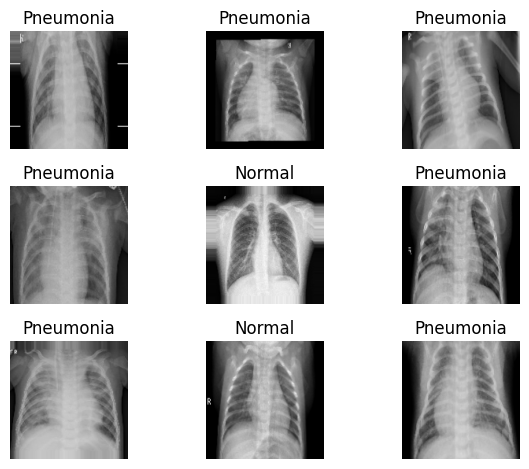

In [24]:
x_batch, y_batch = next(train_generator)   #needed to convert in a form to display

for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(x_batch[i])
    plt.title('Pneumonia' if y_batch[i]==1 else 'Normal')
    
    plt.axis('off')
plt.tight_layout()
plt.show()

In [25]:
pred=model.predict(x_batch)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


Actual
Pnuemonia
Predicted
Normal


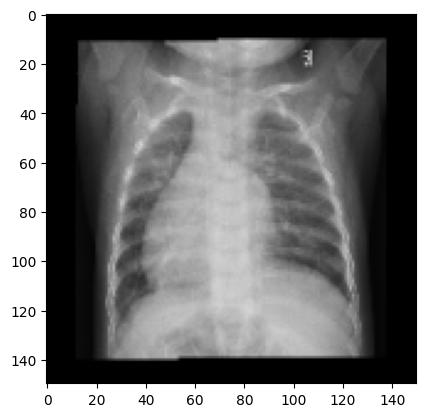

In [26]:
#Random image le kar

plt.imshow(x_batch[1])
print('Actual')
if(y_batch[1]==1):
    print('Pnuemonia')
else:
    print('Normal')
print('Predicted')

if(pred[1]>0.5):
    print('Pnuemonia')
else:
    print('Normal')

In [20]:
#To display

from tensorflow.keras.preprocessing import image
img=image.load_img("Datasets/Pneumonia_X_Ray/chest_xray/train/NORMAL/NORMAL2-IM-0416-0001.jpeg", target_size=(150,150))

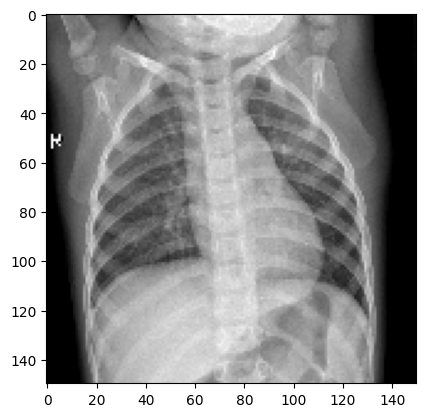

In [21]:
plt.imshow(img)

In [22]:
import numpy as np

img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array, axis=0)
img_array/=255.0
prediction=model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


In [26]:
#we need to find class lables
class_index=train_generator.class_indices
print("Class indices:", train_generator.class_indices)

Class indices: {'NORMAL': 0, 'PNEUMONIA': 1}


In [36]:
print(prediction)
pred=np.argmax(prediction, axis=1)[0]
class_labels= list(train_generator.class_indices.keys())
pred_l=class_labels[pred]
print(pred_l)

#actual label input le le and display with predicted one and display image




[[0.3528832]]
NORMAL
